# Delhivery Case Study

![](https://i.postimg.cc/mkKCL8Cf/cover-image.webp)

**Problem Statement:** Delhivery is one of the fastest growing logistics firm in India providing reliable transportation to various segments of the economy ranging from retail customers to ecommerce giants. They aim to build state of the art operations and gain competitive advanyage by minimising delivery time and achieving maximum efficiency in logistics.

Using this dataset, the firm wants to find opportunities to improve efficiency in operations and understand how the estimated delivery time/distance varies with respect to the actual delivery time/distance.

## About the Dataset

Column Profiling:

* data - tells whether the data is testing or training data
* trip_creation_time – Timestamp of trip creation
* route_schedule_uuid – Unique Id for a particular route schedule
* route_type – Transportation type
> * FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way.  
> * Carting: Handling system consisting of small vehicles (carts)
* trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
* source_center - Source ID of trip origin
* source_name - Source Name of trip origin
* destination_cente – Destination ID
* destination_name – Destination Name
* od_start_time – Trip start time
* od_end_time – Trip end time
* start_scan_to_end_scan – Time taken to deliver from source to destination
* is_cutoff – Unknown field
* cutoff_factor – Unknown field
* cutoff_timestamp – Unknown field
* actual_distance_to_destination – Distance in Kms between source and destination warehouse
* actual_time – Actual time taken to complete the delivery (Cumulative)
* osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
* osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
* factor – Unknown field
* segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
* segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
* segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
* segment_factor – Unknown field

## Import Libraries

In [163]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Downloading the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def custom_date_parser(s):
  return pd.to_datetime(s.split('.')[0])

df = pd.read_csv('/content/drive/MyDrive/Jovian/snehabajaj108 delhivery-eda/delhivery.csv',
                 parse_dates=['trip_creation_time','od_start_time','od_end_time','cutoff_timestamp'],
                 date_parser = custom_date_parser)

In [4]:
df.shape

(144867, 24)

In [5]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,...,2018-09-20 04:01:19,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [7]:
# removing unknown columns

df.drop(columns=['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'], inplace=True)

In [158]:
#Converting data type of categorical columns
df['route_type'] = df['route_type'].astype('category')

# Data Cleaning & Feature Extraction

In [8]:
df.loc[df.trip_uuid=='trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
5,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45,2018-09-20 06:36:55,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171
6,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45,2018-09-20 06:36:55,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719
7,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45,2018-09-20 06:36:55,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362
8,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45,2018-09-20 06:36:55,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648
9,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45,2018-09-20 06:36:55,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434


## Merging Rows by Trip ID

Since every trip_id contains multiple trips with different source and destination, first we will merge rows with unique trip_id-source-destination combination:

In [9]:
df['segment_id'] = df['trip_uuid']+df['source_center']+df['destination_center']
df['segment_actual_time'] = df.groupby('segment_id')['segment_actual_time'].cumsum()
df['segment_osrm_time'] = df.groupby('segment_id')['segment_osrm_time'].cumsum()
df['segment_osrm_distance'] = df.groupby('segment_id')['segment_osrm_distance'].cumsum()

In [10]:
df.loc[df['trip_uuid']=='trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_id
0,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320IND388121AAAIND388620AAB
1,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,18.936842,24.0,20.0,21.7243,24.0,20.0,21.7243,trip-153741093647649320IND388121AAAIND388620AAB
2,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,27.637279,40.0,28.0,32.5395,40.0,27.0,32.5395,trip-153741093647649320IND388121AAAIND388620AAB
3,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,36.118028,62.0,40.0,45.5620,61.0,39.0,45.5619,trip-153741093647649320IND388121AAAIND388620AAB
4,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,39.386040,68.0,44.0,54.2181,67.0,44.0,49.4772,trip-153741093647649320IND388121AAAIND388620AAB
5,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45,2018-09-20 06:36:55,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171,trip-153741093647649320IND388620AABIND388320AAA
6,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45,2018-09-20 06:36:55,109.0,18.045481,44.0,17.0,21.2890,43.0,17.0,21.2890,trip-153741093647649320IND388620AABIND388320AAA
7,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45,2018-09-20 06:36:55,109.0,28.061896,65.0,29.0,35.8252,64.0,28.0,35.8252,trip-153741093647649320IND388620AABIND388320AAA
8,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45,2018-09-20 06:36:55,109.0,38.939167,76.0,39.0,47.1900,74.0,38.0,47.1900,trip-153741093647649320IND388620AABIND388320AAA
9,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45,2018-09-20 06:36:55,109.0,43.595802,102.0,45.0,53.2334,100.0,44.0,53.2334,trip-153741093647649320IND388620AABIND388320AAA


In [11]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_id'],
      dtype='object')

In [12]:
merge_segment = {'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'trip_uuid':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'last',
              'actual_distance_to_destination':'last',
              'actual_time':'last',
              'osrm_time':'last',
              'osrm_distance':'last',
              'segment_actual_time':'last',
              'segment_osrm_time':'last',
              'segment_osrm_distance':'last'
}

In [13]:
segment_df = df.sort_values('segment_id','actual_time').groupby('segment_id').agg(merge_segment).reset_index()
segment_df.head()

,segment_id,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748IND209304AAAIND000000ACB,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46,2018-09-13 13:40:23,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748IND462022AAAIND209304AAA,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16,2018-09-12 16:39:46,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164IND561203AABIND562101AAA,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09,2018-09-12 03:01:59,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164IND572101AAAIND561203AAB,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22,2018-09-12 02:03:09,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517IND000000ACBIND160002AAC,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17,2018-09-14 17:34:55,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408


In [14]:
segment_df.loc[segment_df['trip_uuid']=='trip-153741093647649320']

,segment_id,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
10374,trip-153741093647649320IND388121AAAIND388620AAB,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,39.386040,68.0,44.0,54.2181,67.0,44.0,49.4772
10375,trip-153741093647649320IND388620AABIND388320AAA,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45,2018-09-20 06:36:55,109.0,43.595802,102.0,45.0,53.2334,100.0,44.0,53.2334


Now we can merge the rows using trip_id

In [15]:
merge_trip = {'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'sum',
              'actual_distance_to_destination':'sum',
              'actual_time':'sum',
              'osrm_time':'sum',
              'osrm_distance':'sum',
              'segment_actual_time':'sum',
              'segment_osrm_time':'sum',
              'segment_osrm_distance':'sum'}

In [42]:
trip_df = segment_df.sort_values(['trip_uuid','od_start_time']).groupby('trip_uuid').agg(merge_trip).reset_index()
trip_df.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16,2018-09-13 13:40:23,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22,2018-09-12 03:01:59,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33,2018-09-14 17:34:55,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,2018-09-12 00:01:00,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00,2018-09-12 01:41:29,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09,2018-09-12 12:00:30,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


In [43]:
trip_df.shape

(14817, 18)

We have managed to get a dataframe of 14817 unique trip IDs

## Handling Missing Values

In [44]:
#Check for missing values in the aggregated data
trip_df.isna().sum()

trip_uuid                          0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
source_center                      0
source_name                       10
destination_center                 0
destination_name                   8
od_start_time                      0
od_end_time                        0
start_scan_to_end_scan             0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
dtype: int64

In [45]:
# Remove trips with missing values in source/destination
trip_df.dropna(inplace=True)
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14800 entries, 0 to 14816
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14800 non-null  object        
 1   trip_creation_time              14800 non-null  datetime64[ns]
 2   route_schedule_uuid             14800 non-null  object        
 3   route_type                      14800 non-null  object        
 4   source_center                   14800 non-null  object        
 5   source_name                     14800 non-null  object        
 6   destination_center              14800 non-null  object        
 7   destination_name                14800 non-null  object        
 8   od_start_time                   14800 non-null  datetime64[ns]
 9   od_end_time                     14800 non-null  datetime64[ns]
 10  start_scan_to_end_scan          14800 non-null  float64       
 11  ac

In [46]:
trip_df.isna().sum()

trip_uuid                         0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

## Feature Extraction

Lets split the destination_name column into useful features such as state, city, place and code

In [47]:
trip_df.destination_name.value_counts()

Gurgaon_Bilaspur_HB (Haryana)        813
Bangalore_Nelmngla_H (Karnataka)     628
Bhiwandi_Mankoli_HB (Maharashtra)    573
Chandigarh_Mehmdpur_H (Punjab)       431
Hyderabad_Shamshbd_H (Telangana)     400
                                    ... 
Bolpur_WebelDPP_D (West Bengal)        1
Bhandara_KaremDPP_D (Maharashtra)      1
Shirdi_SaiBansi_D (Maharashtra)        1
Sullia_Srirampt_D (Karnataka)          1
Jaipur_Central_D_1 (Rajasthan)         1
Name: destination_name, Length: 949, dtype: int64

We can observe here that the state name is enclosed in brackets at the end.

In [48]:
#extracting state
def extract_state(a):
  return a.split('(')[1][:-1]
trip_df['destination_state'] = trip_df.destination_name.apply(extract_state)
trip_df.destination_state.value_counts()

Maharashtra               2591
Karnataka                 2275
Haryana                   1667
Tamil Nadu                1072
Telangana                  838
Gujarat                    746
Uttar Pradesh              732
West Bengal                708
Punjab                     693
Delhi                      675
Rajasthan                  523
Andhra Pradesh             414
Bihar                      363
Madhya Pradesh             337
Kerala                     273
Assam                      234
Jharkhand                  168
Orissa                     119
Uttarakhand                113
Goa                         65
Chhattisgarh                43
Himachal Pradesh            40
Chandigarh                  29
Arunachal Pradesh           23
Dadra and Nagar Haveli      17
Jammu & Kashmir             15
Pondicherry                 10
Meghalaya                    8
Mizoram                      6
Nagaland                     1
Tripura                      1
Daman & Diu                  1
Name: de

In [49]:
#extracting city
def extract_city(a):
  if '_' not in a:
    return a.split(' ')[0]
  else:
    return a.split('_')[0]

trip_df['destination_city'] = trip_df.destination_name.apply(extract_city)

array(['Gurgaon', 'Chikblapur', 'Chandigarh', 'Mumbai', 'Bellary',
       'Chennai', 'HBR', 'Surat', 'Delhi', 'PNQ', 'Faridabad', 'Kolhapur',
       'Bangalore', 'Hyderabad', 'Gulbarga', 'Jaipur', 'Satna',
       'Janakpuri', 'Guwahati', 'Kanpur', 'Bareli', 'Nashik', 'Kolkata',
       'Puttaprthi', 'Sivasagar', 'Bengaluru', 'Vadipatti', 'Jalandhar',
       'Yavatmal', 'Sangola', 'Savner', 'FBD', 'Bhatinda', 'Bhiwandi',
       'Barnala', 'Murbad', 'Ludhiana', 'Ahmedabad', 'Jabalpur', 'MAA',
       'Pune', 'Bishnupur', 'Silvassa', 'Junagadh', 'Upleta', 'Mehsana',
       'Katni', 'Mysore', 'Radhanpur', 'Bhopal', 'Bhubaneshwar',
       'Allahabad', 'Sonipat', 'Sasaram', 'Ranchi', 'Pondicherry', 'GZB',
       'Anand', 'Nanded', 'Noida', 'Villupuram', 'Durgapur', 'Bhadrak',
       'Goa', 'Balurghat', 'Hisar', 'Ambur', 'Haridwar', 'Kamareddy',
       'Hospet', 'BilaspurHP', 'Kharagpur', 'Kirauli', 'BLR',
       'Dhaurahara', 'Mangalore', 'Vansda', 'Mananthavady', 'Lucknow',
       'Silchar', 

In [50]:
#Extracting state and city from source_name
trip_df['source_state'] = trip_df.source_name.apply(extract_state)
trip_df['source_city'] = trip_df.source_name.apply(extract_city)

In [85]:
trip_df[['destination_name','destination_state','destination_city',
         'source_name','source_state','source_city']].sample(10)

,destination_name,destination_state,destination_city,source_name,source_state,source_city
1680,Mumbai Hub (Maharashtra),Maharashtra,Mumbai,Bhiwandi_Mankoli_HB (Maharashtra),Maharashtra,Bhiwandi
4101,Del_Okhla_PC (Delhi),Delhi,Del,Ghaziabad_MohanNgr_C (Uttar Pradesh),Uttar Pradesh,Ghaziabad
5941,Hyderabad_Uppal_L (Telangana),Telangana,Hyderabad,Hyderabad_Shamshbd_H (Telangana),Telangana,Hyderabad
8958,Chandigarh_Mehmdpur_H (Punjab),Punjab,Chandigarh,Patiala (Punjab),Punjab,Patiala
1174,Ludhiana_MilrGanj_HB (Punjab),Punjab,Ludhiana,Ludhiana_GillChwk_DC (Punjab),Punjab,Ludhiana
464,Gurgaon_Bilaspur_HB (Haryana),Haryana,Gurgaon,Delhi_Wazirpur_L (Delhi),Delhi,Delhi
3902,Bhiwandi_Mankoli_HB (Maharashtra),Maharashtra,Bhiwandi,Mumbai_Chndivli_PC (Maharashtra),Maharashtra,Mumbai
3212,Mumbai_Kharghar_D (Maharashtra),Maharashtra,Mumbai,Mumbai_Sanpada_I (Maharashtra),Maharashtra,Mumbai
417,Delhi_Kishangarh_DPC (Delhi),Delhi,Delhi,Del_Okhla_PC (Delhi),Delhi,Del
5542,Sahatwar_PnchmDPP_D (Uttar Pradesh),Uttar Pradesh,Sahatwar,Gorakhpur_Matriprm_IP (Uttar Pradesh),Uttar Pradesh,Gorakhpur


In [55]:
#Extracting datetime features from trip_creation_date
trip_df['trip_year']=trip_df['trip_creation_time'].dt.year
trip_df['trip_month']=trip_df['trip_creation_time'].dt.month
trip_df['trip_day'] = trip_df['trip_creation_time'].dt.day
trip_df['trip_hour'] = trip_df['trip_creation_time'].dt.hour
trip_df['trip_dayofweek']=trip_df['trip_creation_time'].dt.day_of_week

In [84]:
trip_df[['trip_creation_time','trip_year','trip_month','trip_day',
         'trip_hour','trip_dayofweek']].sample(10)

,trip_creation_time,trip_year,trip_month,trip_day,trip_hour,trip_dayofweek
4945,2018-09-19 22:13:10,2018,9,19,22,2
7179,2018-09-23 18:44:55,2018,9,23,18,6
4101,2018-09-18 16:25:17,2018,9,18,16,1
6600,2018-09-22 16:56:30,2018,9,22,16,5
336,2018-09-12 14:53:48,2018,9,12,14,2
6881,2018-09-23 01:00:51,2018,9,23,1,6
2913,2018-09-16 18:42:45,2018,9,16,18,6
9593,2018-09-27 22:14:08,2018,9,27,22,3
5522,2018-09-20 22:08:55,2018,9,20,22,3
5180,2018-09-20 05:33:55,2018,9,20,5,3


In [154]:
#Calculate trip_time

trip_df['trip_time_mins'] = (trip_df['od_end_time'] - trip_df['od_start_time']).dt.total_seconds()/(60)
trip_df['trip_time'] = trip_df['od_end_time'] - trip_df['od_start_time']

In [155]:
trip_df[['od_start_time','od_end_time','trip_time_mins','trip_time']].head()

,od_start_time,od_end_time,trip_time_mins,trip_time
0,2018-09-12 00:00:22,2018-09-12 03:01:59,181.616667,0 days 03:01:37
1,2018-09-12 00:01:00,2018-09-12 01:41:29,100.483333,0 days 01:40:29
2,2018-09-12 00:02:09,2018-09-12 12:00:30,718.350000,0 days 11:58:21
3,2018-09-12 00:02:34,2018-09-12 03:13:03,190.483333,0 days 03:10:29
4,2018-09-12 00:04:22,2018-09-12 01:42:22,98.000000,0 days 01:38:00


## Handling Outliers

In this section, we will identify and handle outliers using the IQR method

In [61]:
numeric_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance']

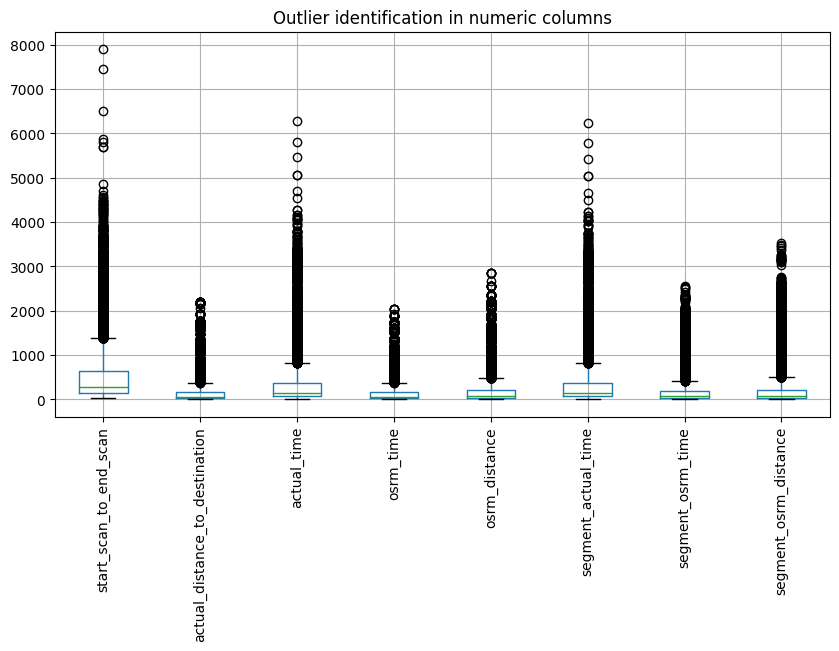

In [68]:
trip_df[numeric_cols].boxplot(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Outlier identification in numeric columns')
plt.show();

In [71]:
#Calculating IQR (Inter Quartile Range)
q1 = trip_df[numeric_cols].quantile(0.25)
q3 = trip_df[numeric_cols].quantile(0.75)

iqr = q3-q1
iqr

start_scan_to_end_scan            489.000000
actual_distance_to_destination    141.919184
actual_time                       303.000000
osrm_time                         139.250000
osrm_distance                     177.857750
segment_actual_time               301.000000
segment_osrm_time                 155.000000
segment_osrm_distance             186.299975
dtype: float64

In [75]:
trip_df = trip_df[~((trip_df[numeric_cols]<q1-(1.5*iqr)) | (trip_df[numeric_cols]>q3+(1.5*iqr))).any(axis=1)].reset_index()

In [76]:
#Checking the number of rows after removing outliers
trip_df.shape

(12744, 29)

We see that around 56 trips have been removed due to outlier detection

# Exploratory Data Analysis

In [77]:
#Statistical Summary

trip_df[numeric_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000,12744.000000
mean,322.166824,72.840581,178.612837,78.992546,92.396940,176.948682,86.527150,98.697578
std,257.550322,72.611124,159.187899,72.898179,90.244340,158.133558,80.244315,95.577469
min,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900
25%,136.000000,21.403779,61.000000,27.000000,28.357800,60.000000,28.000000,29.464775
50%,234.000000,38.657143,115.000000,50.000000,48.619050,114.000000,53.000000,54.226200
75%,427.000000,103.167305,254.000000,111.000000,132.065825,251.000000,127.000000,141.580900
max,1366.000000,373.441224,820.000000,376.000000,474.133700,818.000000,417.000000,497.792900


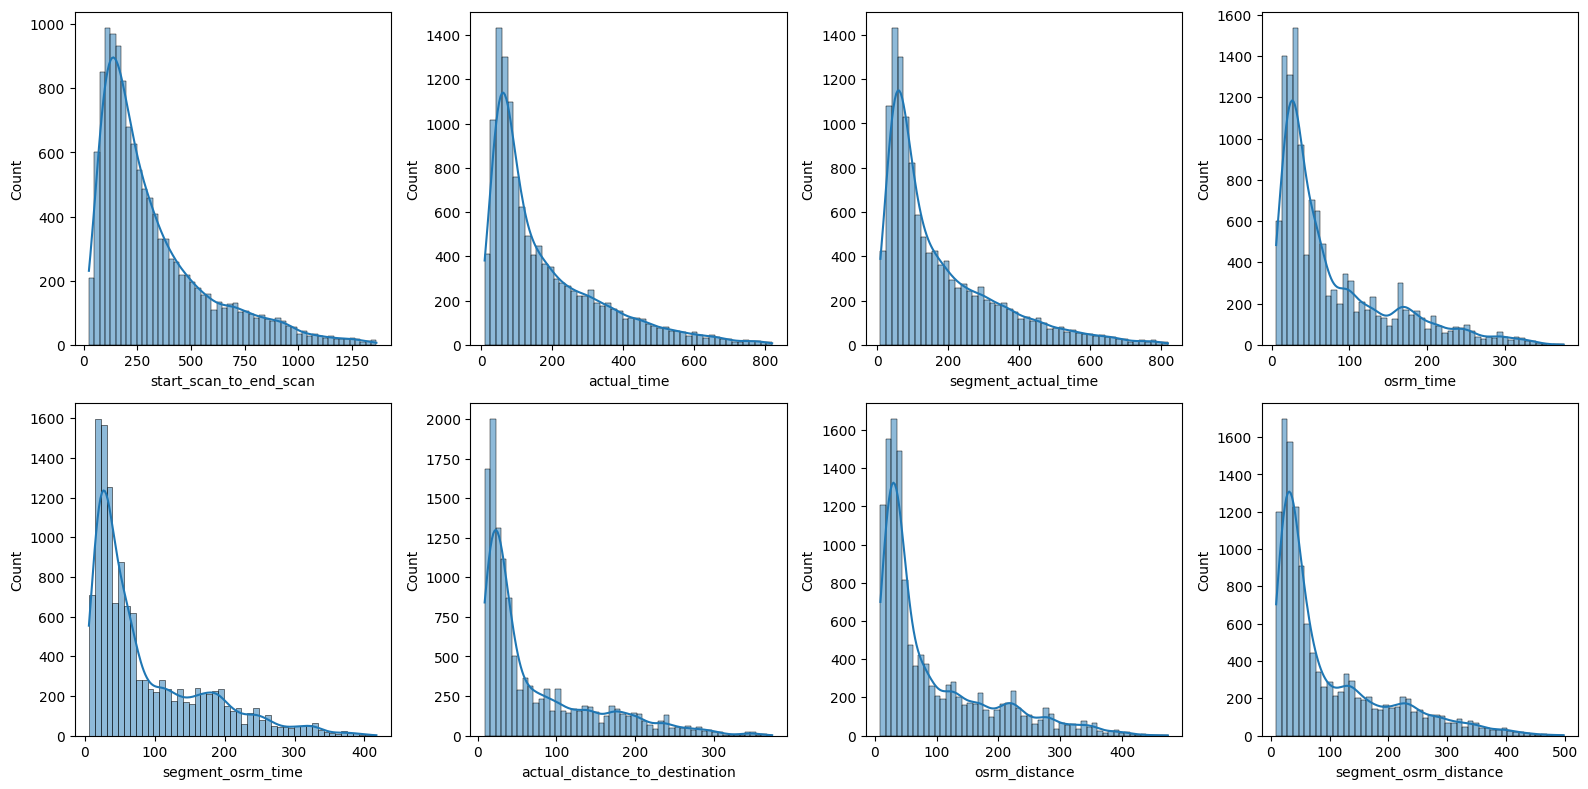

In [162]:
#Distribution plots of continuous features

fig, ax = plt.subplots(2,4, figsize=(16,8))

sns.histplot(data=trip_df['start_scan_to_end_scan'], kde=True, ax=ax[0,0])
sns.histplot(data=trip_df['actual_time'], kde=True, ax=ax[0,1])
sns.histplot(data=trip_df['segment_actual_time'], kde=True, ax=ax[0,2])
sns.histplot(data=trip_df['osrm_time'], kde=True, ax=ax[0,3])
sns.histplot(data=trip_df['segment_osrm_time'], kde=True, ax=ax[1,0])
sns.histplot(data=trip_df['actual_distance_to_destination'], kde=True, ax=ax[1,1])
sns.histplot(data=trip_df['osrm_distance'], kde=True, ax=ax[1,2])
sns.histplot(data=trip_df['segment_osrm_distance'], kde=True, ax=ax[1,3])

plt.tight_layout()
plt.show()

While the maximum osrm_time is 400 mins (6.6 hrs), the actual time goes upto 800 mins (13 hrs) which is almost double

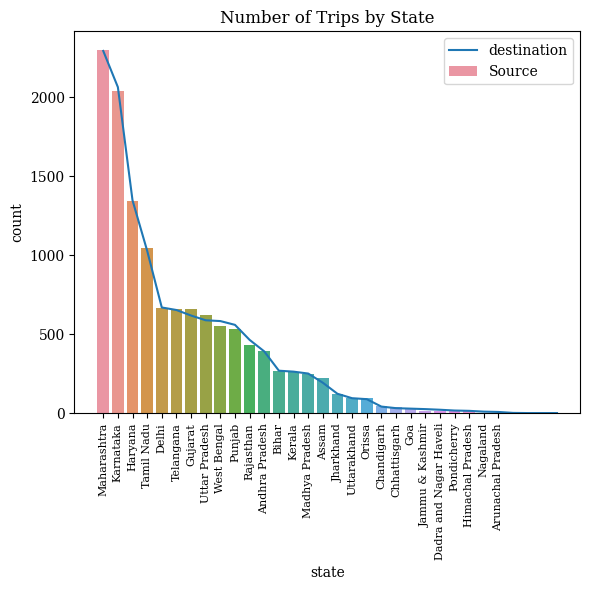

In [231]:
#Number of Trips by Source & Destination State
plt.figure(figsize=(6,6))

source=trip_df.source_state.value_counts().reset_index().rename(columns={'index': 'state',
                                                                  'source_state':'count'})

destination=trip_df.destination_state.value_counts().reset_index().rename(columns={'index':'state',
    'destination_state': 'count'})

sns.barplot(data=source, x='state', y='count', label='Source')
sns.lineplot(data=destination, x='state', y='count', label='destination')
plt.title('Number of Trips by State')
plt.legend()
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show();

1. Maharashtra, Karnataka, Haryana, Tamil Nadu have highest number of deliveries
2. Smaller states like Arunachal Pradesh, Nagaland, Himachal, Goa etc have the lowest volumes as expected

In [167]:
!pip install pySankey --quiet

In [178]:
#Flow between top states

state_colors = {
    "Karnataka": "#FF7F50",
    "Maharashtra": "#FF6347",
    "Tamil Nadu": "#800080",
    "Gujarat": "#FFA500",
    "Delhi": "#E6E6FA",
    "Haryana": "#808080",
    "Telangana": "#00FFFF",
    "Rajasthan": "#0000FF",
    "Uttar Pradesh": "#FFFF00",
    "Assam": "#FFD700",
    "Madhya Pradesh": "#00FF00",
    "West Bengal": "#FFC0CB",
    "Andhra Pradesh": "#FF00FF",
    "Punjab": "#FF0000",
    "Kerala": "#00FF00",
    "Bihar": "#800000",
}

flow = trip_df[(trip_df["source_state"].isin(state_colors.keys())) & (trip_df["destination_state"].isin(state_colors.keys()))][['source_state','destination_state']]

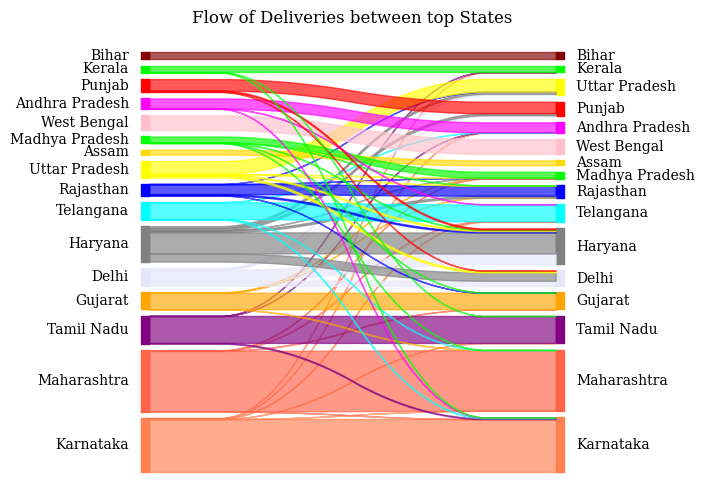

In [184]:
from pySankey.sankey import sankey

sankey(flow.source_state, flow.destination_state, aspect=20, colorDict=state_colors, fontsize=10)
plt.title('Flow of Deliveries between top States')
plt.show();

We can see that the maximum trips are intra-state. Karnataka and Maharashtra have the highest volumes of trips

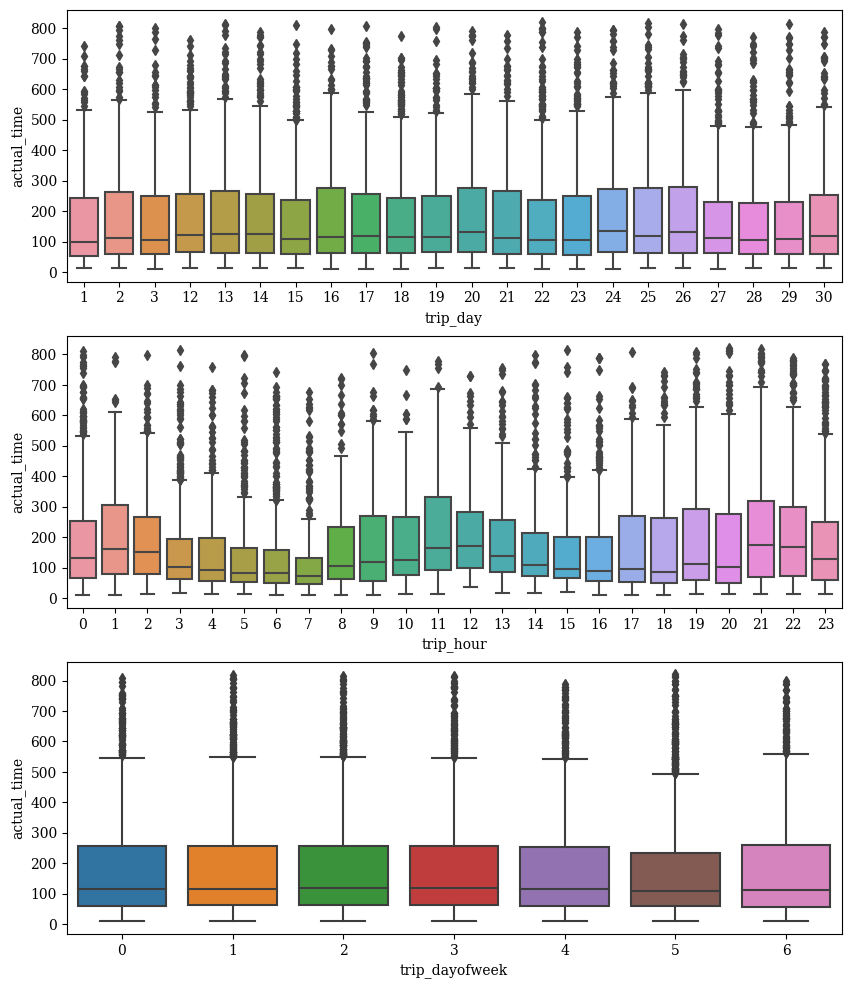

In [248]:
#Actual Delivery time by month/weekday/day/hour

fig, ax = plt.subplots(3,1,figsize=(10,12))

sns.boxplot(data=trip_df, x='trip_day', y='actual_time', ax=ax[0])
sns.boxplot(data=trip_df, x='trip_hour', y='actual_time', ax=ax[1])
sns.boxplot(data=trip_df, x='trip_dayofweek', y='actual_time', ax=ax[2])

plt.show();

* (9:00 am to 12:00) pm and (5:00pm to 10:00pm) seem to be the busiest hours of the day when the average delivery time is higher
* The day/weekday of delivery has no significant impact on the delivery time

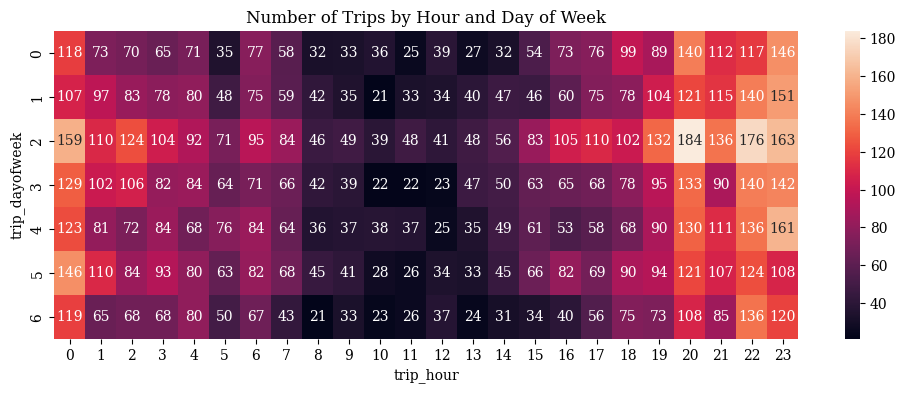

In [255]:
#Number of Trips by hour and Day of week
data = pd.pivot_table(data=trip_df, index='trip_dayofweek', columns='trip_hour', values='trip_uuid', aggfunc='count')
plt.figure(figsize=(12,4))
sns.heatmap(data, annot=True, fmt='d')
plt.title('Number of Trips by Hour and Day of Week')

plt.show()

* Wednesday is the busiest day of the week with maximum number of trips  
* 10pm-1am is the busiest time of the day having maximum number of trips (probably because the delivery time is least during these hours - less traffic on the roads)

In [260]:
#Busiest Corridors
trip_df.groupby(['source_name','destination_name'])['trip_uuid'].count().sort_values(ascending=False).reset_index().head(10)

,source_name,destination_name,trip_uuid
0,Bangalore_Nelmngla_H (Karnataka),Bengaluru_KGAirprt_HB (Karnataka),151
1,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),122
2,Bengaluru_Bomsndra_HB (Karnataka),Bengaluru_KGAirprt_HB (Karnataka),121
3,Bhiwandi_Mankoli_HB (Maharashtra),Bhiwandi_Mankoli_HB (Maharashtra),111
4,Bengaluru_KGAirprt_HB (Karnataka),Bangalore_Nelmngla_H (Karnataka),108
5,Ahmedabad_East_H_1 (Gujarat),Ahmedabad_East_H_1 (Gujarat),107
6,Bhiwandi_Mankoli_HB (Maharashtra),Mumbai Hub (Maharashtra),105
7,Mumbai_Chndivli_PC (Maharashtra),Bhiwandi_Mankoli_HB (Maharashtra),99
8,Bangalore_Nelmngla_H (Karnataka),Bengaluru_Bomsndra_HB (Karnataka),97
9,Gurgaon_Bilaspur_HB (Haryana),Sonipat_Kundli_H (Haryana),92


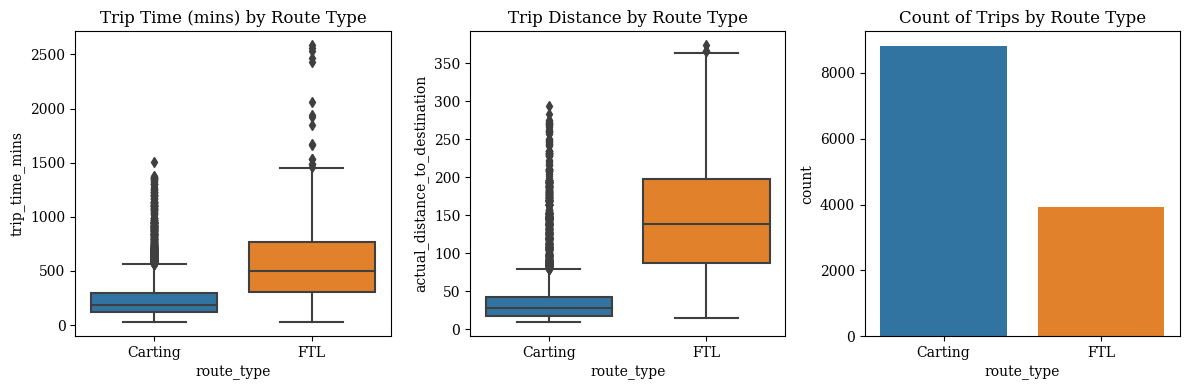

In [268]:
#time and distance by route_type

fig, ax = plt.subplots(1,3,figsize=(12,4))

sns.boxplot(data=trip_df, x='route_type', y='trip_time_mins', ax=ax[0])
sns.boxplot(data=trip_df, x='route_type', y='actual_distance_to_destination', ax=ax[1])
sns.countplot(x=trip_df['route_type'], ax=ax[2])

ax[0].set_title('Trip Time (mins) by Route Type')
ax[1].set_title('Trip Distance by Route Type')
ax[2].set_title('Count of Trips by Route Type')

plt.tight_layout()
plt.show();

* Carting route type is used for short-distance (0-100km) and short duration (\<500 mins) trips  while FTLs are used for long-distance (>100km) and long-duration (>300 mins) trips
* FTL trips are 50% of carting trips in count

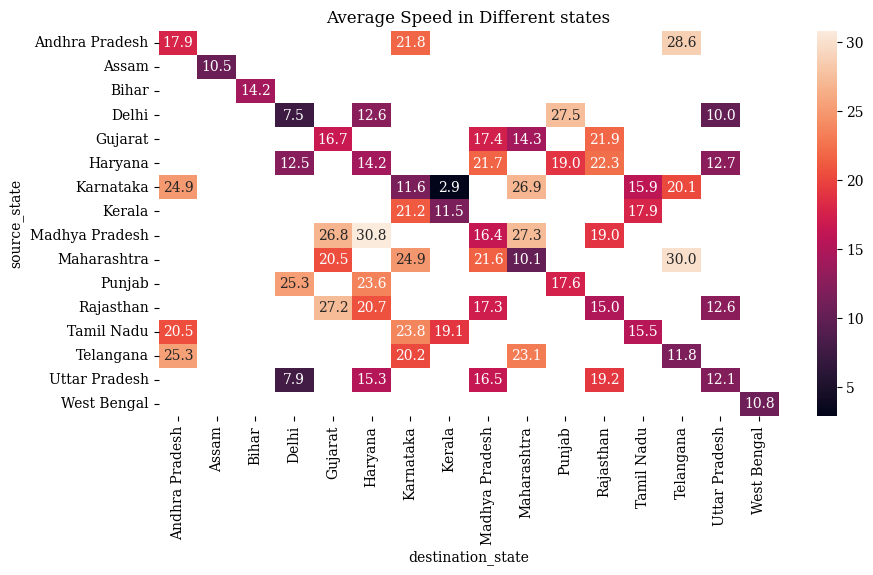

In [276]:
#Average trip time by source and destination state
flow = trip_df[(trip_df["source_state"].isin(state_colors.keys())) & (trip_df["destination_state"].isin(state_colors.keys()))][['source_state','destination_state','trip_time_mins','actual_distance_to_destination']]
flow['speed'] = flow['actual_distance_to_destination']/(flow['trip_time_mins']/60)
data = pd.pivot_table(data=flow, index='source_state', columns='destination_state', values='speed', aggfunc='mean')
plt.figure(figsize=(10,5))
sns.heatmap(data, annot=True, fmt='.1f')
plt.title('Average Speed in Different states')

plt.show()

* It can be observed that average speed in inter-state deliveries is much higher than in intra-state deliveries
* Delhi has the lowest intra-state delivery speed while Punjab has the highest

# Hypothesis Testing & Visual Analysis

## Actual Time & OSRM Time

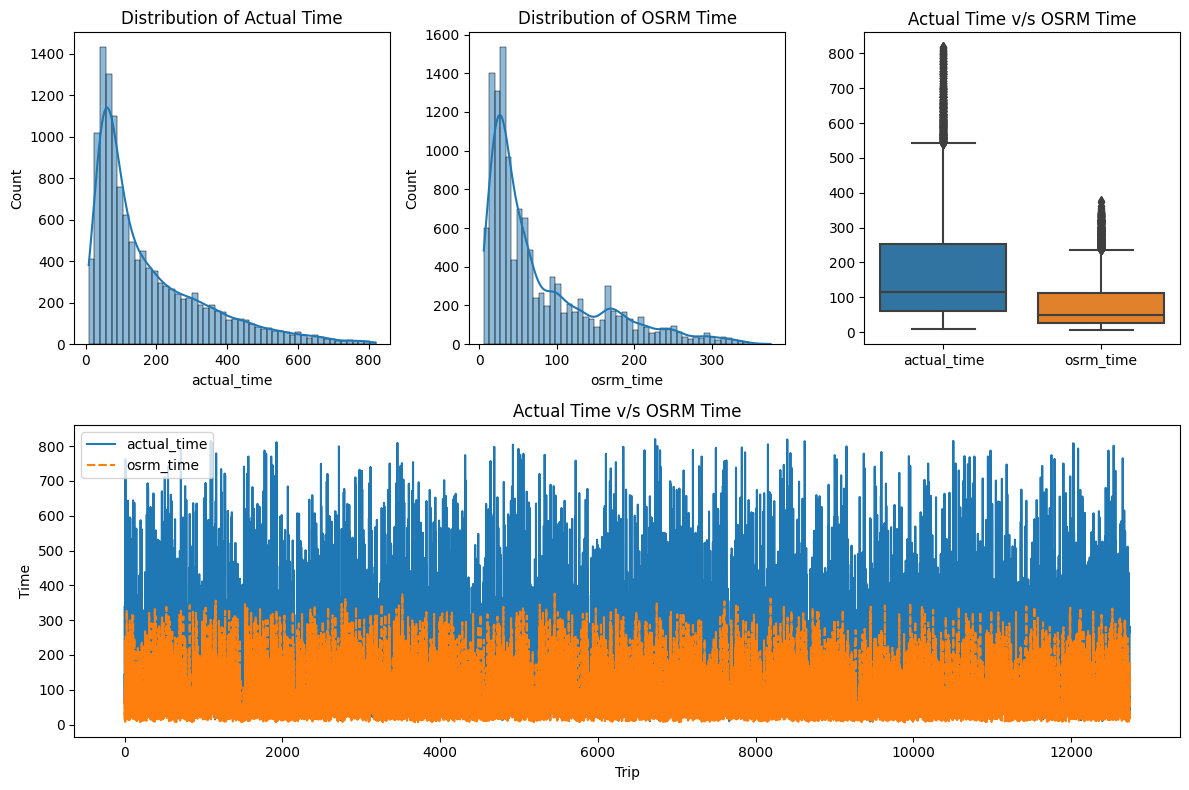

In [108]:
#distribution of actual time and osrm time

fig = plt.figure(figsize=(12,8))

ax = [None for i in range(4)]

ax[0] = plt.subplot2grid((2,3), (0,0), colspan=1)
ax[1] = plt.subplot2grid((2,3), (0,1), colspan=1)
ax[2] = plt.subplot2grid((2,3), (0,2), colspan=1)
ax[3] = plt.subplot2grid((2,3), (1,0), colspan=3)

sns.histplot(data = trip_df['actual_time'], kde=True, ax=ax[0])
sns.histplot(data=trip_df['osrm_time'], kde=True, ax=ax[1])
sns.boxplot(data = trip_df[['actual_time','osrm_time']], ax=ax[2])
sns.lineplot(data = trip_df[['actual_time','osrm_time']], ax=ax[3])
ax[0].set_title('Distribution of Actual Time')
ax[1].set_title('Distribution of OSRM Time')
ax[2].set_title('Actual Time v/s OSRM Time')
ax[3].set_title('Actual Time v/s OSRM Time')
ax[3].set_xlabel('Trip')
ax[3].set_ylabel('Time')

plt.tight_layout()
plt.show();

* The histograms show that both actual_time and osrm_time is right skewed and not nrmally distributed
* We can clearly see from the box plot and the lineplot that the actual time is much higher than the OSRM time

In [95]:
print('Variance of Actual Time:',trip_df.actual_time.var())
print('Variance of OSRM Time', trip_df.osrm_time.var())

Variance of Actual Time: 25340.78707838022
Variance of OSRM Time 5314.14457284969


Since independent t-test assumes normally distributed data and equal variances, we will proceed with Mann-Whitney U Test:  
> **Null Hypothesis:** actual_time is not higher than osrm_time

> **Alternative Hypothesis:** actual_time is higher than osrm_time



In [101]:
from scipy.stats import mannwhitneyu

sample1 = trip_df.actual_time
sample2 = trip_df.osrm_time
alpha = 0.05

u_stat, p_value = mannwhitneyu(sample1, sample2, alternative='greater')

print('Test Statistic:', u_stat)
print('P value:', p_value)

if p_value>alpha:
  print("Result: \nFail to reject null hypothesis. \n Actual time is not higher than osrm time")
else:
  print("Result: \nReject null hypothesis. \nActual time is higher than osrm time")

Test Statistic: 119792881.5
P value: 0.0
Result: 
Reject null hypothesis. 
Actual time is higher than osrm time


## Actual Time & Segment Actual Time

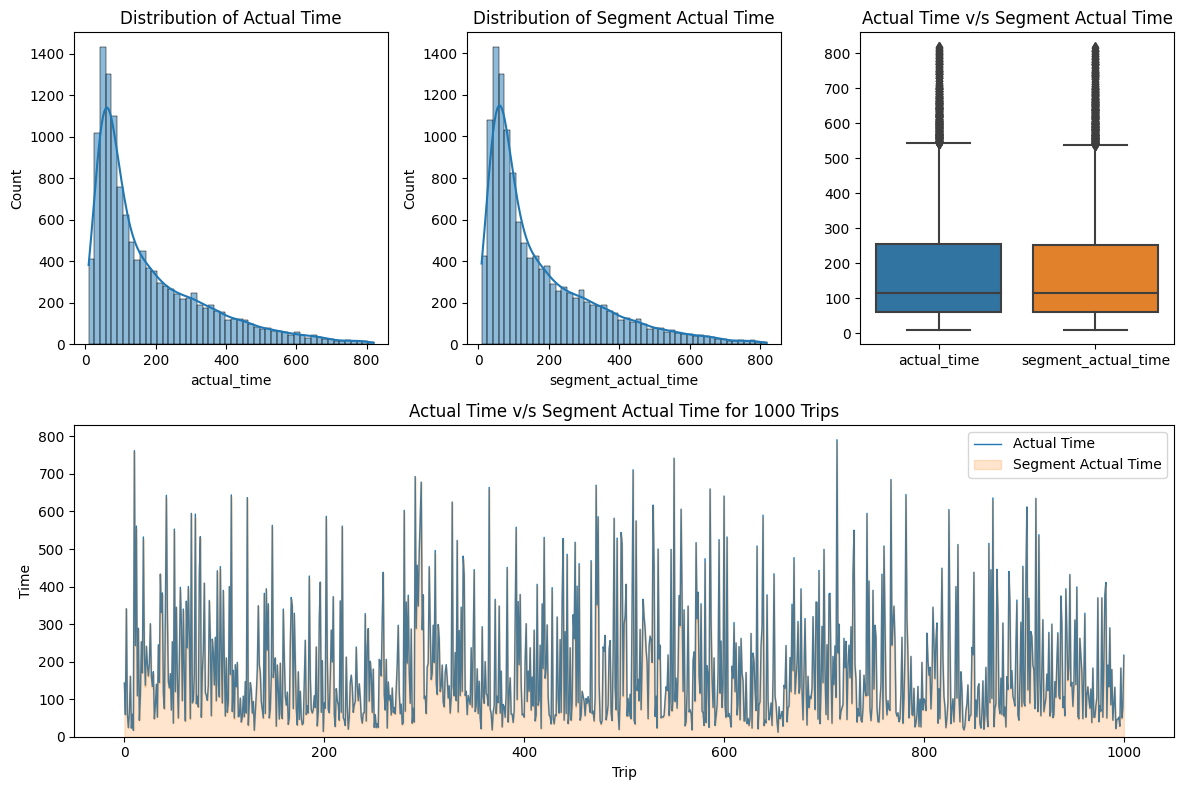

In [130]:
#distribution of actual time and segment actual time

fig = plt.figure(figsize=(12,8))

ax = [None for i in range(4)]

ax[0] = plt.subplot2grid((2,3), (0,0), colspan=1)
ax[1] = plt.subplot2grid((2,3), (0,1), colspan=1)
ax[2] = plt.subplot2grid((2,3), (0,2), colspan=1)
ax[3] = plt.subplot2grid((2,3), (1,0), colspan=3)

sns.histplot(data=trip_df['actual_time'], kde=True, ax=ax[0])
sns.histplot(data=trip_df['segment_actual_time'], kde=True, ax=ax[1])
sns.boxplot(data=trip_df[['actual_time','segment_actual_time']], ax=ax[2])
sns.lineplot(data=trip_df['actual_time'].loc[:1000], label='Actual Time',
             ax=ax[3], lw=1)
trip_df['segment_actual_time'].loc[:1000].plot(kind='area', ax=ax[3],
                                              alpha=0.2,
                                              label='Segment Actual Time')

ax[0].set_title('Distribution of Actual Time')
ax[1].set_title('Distribution of Segment Actual Time')
ax[2].set_title('Actual Time v/s Segment Actual Time')
ax[3].set_title('Actual Time v/s Segment Actual Time for 1000 Trips')
ax[3].set_xlabel('Trip')
ax[3].set_ylabel('Time')
ax[3].legend()

plt.tight_layout()
plt.show();

* Both actual time and segment actual time are right-skewed and not normally distributed
* We can see from the boxplot and the lineplot that the actual time and segment actual time do not differ much.

In [134]:
print('Variance of Actual Time:',trip_df.actual_time.var())
print('Variance of Segment Actual Time', trip_df.segment_actual_time.var())

Variance of Actual Time: 25340.78707838022
Variance of Segment Actual Time 25006.222274021275


Independent t-test assumes normally distributed data and equal variances. Since the sample size is large enough, by virtue of central limit theorem, we can assume normal distribution. As both conditions are met, we will proceed with Independent T-Test:  
> **Null Hypothesis:** There is no difference between actual_time and segment_actual_time

> **Alternative Hypothesis:** There is a difference between actual_time and segment_actual_time

In [135]:
from scipy.stats import ttest_ind

sample1 = trip_df.actual_time
sample2 = trip_df.segment_actual_time
alpha = 0.05

t_stat, p_value = ttest_ind(sample1, sample2, alternative='two-sided')

print('Test Statistic:', t_stat)
print('P value:', p_value)

if p_value>alpha:
  print("Result: \nFail to reject null hypothesis. \nThere is no difference between actual time and segment actual time")
else:
  print("Result: \nReject null hypothesis. \nThere is a difference between actual time and segment actual time")

Test Statistic: 0.8372593269133916
P value: 0.4024546671410443
Result: 
Fail to reject null hypothesis. 
There is no difference between actual time and segment actual time


The hypothesis test result confirms our observation from the visual analysis

## OSRM Distance & Segment OSRM Distance

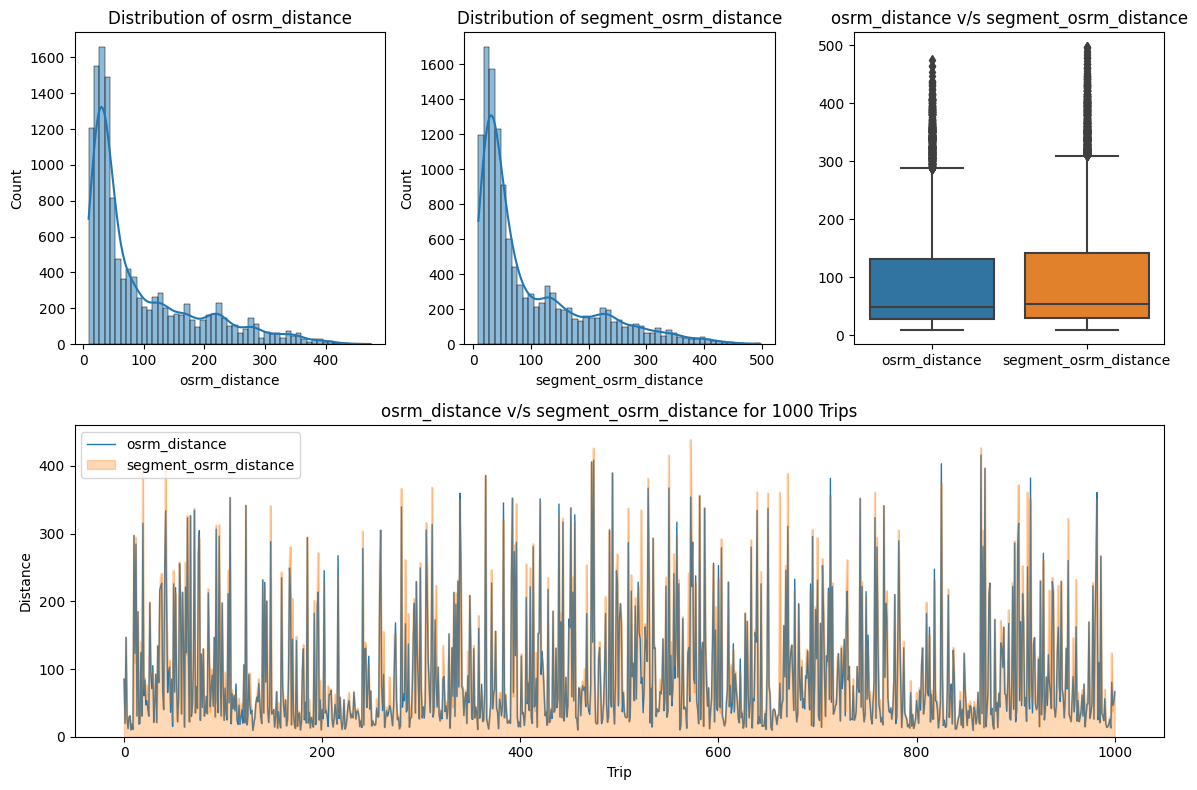

In [138]:
#distribution of osrm distance and segment osrm distance

fig = plt.figure(figsize=(12,8))

ax = [None for i in range(4)]

ax[0] = plt.subplot2grid((2,3), (0,0), colspan=1)
ax[1] = plt.subplot2grid((2,3), (0,1), colspan=1)
ax[2] = plt.subplot2grid((2,3), (0,2), colspan=1)
ax[3] = plt.subplot2grid((2,3), (1,0), colspan=3)

sns.histplot(data=trip_df['osrm_distance'], kde=True, ax=ax[0])
sns.histplot(data=trip_df['segment_osrm_distance'], kde=True, ax=ax[1])
sns.boxplot(data=trip_df[['osrm_distance','segment_osrm_distance']], ax=ax[2])
sns.lineplot(data=trip_df['osrm_distance'].loc[:1000], label='osrm_distance',
             ax=ax[3], lw=1)
trip_df['segment_osrm_distance'].loc[:1000].plot(kind='area', ax=ax[3],
                                              alpha=0.3,
                                              label='segment_osrm_distance')

ax[0].set_title('Distribution of osrm_distance')
ax[1].set_title('Distribution of segment_osrm_distance')
ax[2].set_title('osrm_distance v/s segment_osrm_distance')
ax[3].set_title('osrm_distance v/s segment_osrm_distance for 1000 Trips')
ax[3].set_xlabel('Trip')
ax[3].set_ylabel('Distance')
ax[3].legend()

plt.tight_layout()
plt.show();

* Distributions for both parameters are very similar with right-skew
* The box plot shows a small difference between the mean values of osrm distance and segment osrm distance
* In the sample data of 1000 trips (lineplot), we see that osrm distance is lesser than segment osrm distance in most cases


In [139]:
print('Variance of Actual Time:',trip_df.osrm_distance.var())
print('Variance of Segment Actual Time', trip_df.segment_osrm_distance.var())

Variance of Actual Time: 8144.040864915404
Variance of Segment Actual Time 9135.052634121404


Independent t-test assumes normally distributed data and equal variances. Since the sample size is large enough, by virtue of central limit theorem, we can assume normal distribution. As both conditions are met (variances are not very far apart), we will proceed with Independent T-Test:  
> **Null Hypothesis:** osrm_distance is not lesser than segment_osrm_distance

> **Alternative Hypothesis:** osrm_distance is lesser than segment_osrm_distance

In [145]:
from scipy.stats import ttest_ind

sample1 = trip_df.osrm_distance
sample2 = trip_df.segment_osrm_distance
alpha = 0.05

t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False, alternative='less')

print('Test Statistic:', t_stat)
print('P value:', p_value)

if p_value>alpha:
  print("Result: \nFail to reject null hypothesis. \nosrm_distance is not lesser than segment_osrm_distance")
else:
  print("Result: \nReject null hypothesis. \nosrm_distance is lesser than segment_osrm_distance")

Test Statistic: -5.4109928353068435
P value: 3.162140813443934e-08
Result: 
Reject null hypothesis. 
osrm_distance is lesser than segment_osrm_distance


The hypothesis test result confirms our observation from the visual analysis

## OSRM Time and Segment OSRM Time

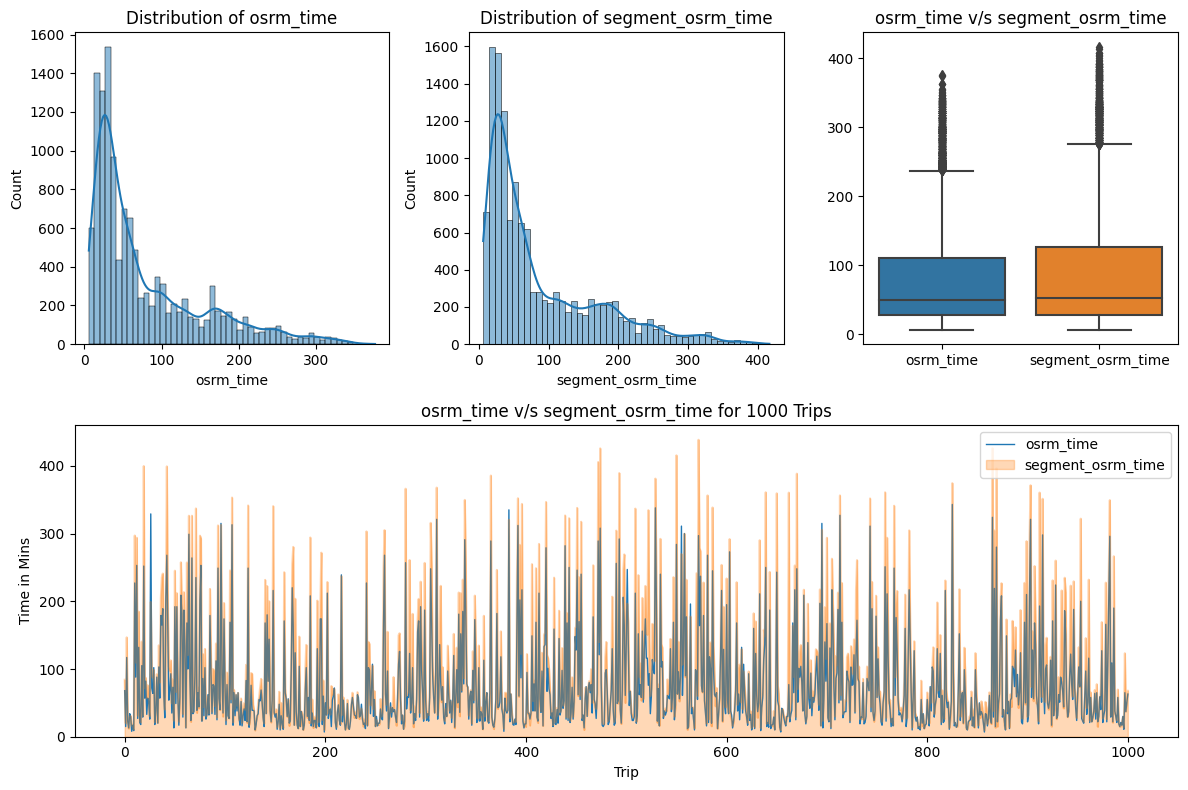

In [149]:
#distribution of osrm distance and segment osrm distance

fig = plt.figure(figsize=(12,8))

ax = [None for i in range(4)]

ax[0] = plt.subplot2grid((2,3), (0,0), colspan=1)
ax[1] = plt.subplot2grid((2,3), (0,1), colspan=1)
ax[2] = plt.subplot2grid((2,3), (0,2), colspan=1)
ax[3] = plt.subplot2grid((2,3), (1,0), colspan=3)

sns.histplot(data=trip_df['osrm_time'], kde=True, ax=ax[0])
sns.histplot(data=trip_df['segment_osrm_time'], kde=True, ax=ax[1])
sns.boxplot(data=trip_df[['osrm_time','segment_osrm_time']], ax=ax[2])
sns.lineplot(data=trip_df['osrm_time'].loc[:1000], label='osrm_time',
             ax=ax[3], lw=1)
trip_df['segment_osrm_distance'].loc[:1000].plot(kind='area', ax=ax[3],
                                              alpha=0.3,
                                              label='segment_osrm_time')

ax[0].set_title('Distribution of osrm_time')
ax[1].set_title('Distribution of segment_osrm_time')
ax[2].set_title('osrm_time v/s segment_osrm_time')
ax[3].set_title('osrm_time v/s segment_osrm_time for 1000 Trips')
ax[3].set_xlabel('Trip')
ax[3].set_ylabel('Time in Mins')
ax[3].legend()

plt.tight_layout()
plt.show();

* The boxplot and the lineplot of 1000 trips shows that osrm_time is lesser than segment_osrm_time
* The distributions are right skewed

In [150]:
print('Variance of OSRM Time:',trip_df.osrm_time.var())
print('Variance of Segment OSRM Time', trip_df.segment_osrm_time.var())

Variance of OSRM Time: 5314.14457284969
Variance of Segment OSRM Time 6439.150169197924


Independent t-test assumes normally distributed data and equal variances. Since the sample size is large enough, by virtue of central limit theorem, we can assume normal distribution. As both conditions are met (variances are not very far apart), we will proceed with Independent T-Test:  
> **Null Hypothesis:** OSRM Time is not lesser than segment OSRM time

> **Alternative Hypothesis:** OSRM Time is lesser than segment OSRM time

In [151]:
from scipy.stats import ttest_ind

sample1 = trip_df.osrm_time
sample2 = trip_df.segment_osrm_time
alpha = 0.05

t_stat, p_value = ttest_ind(sample1, sample2, alternative='less')

print('Test Statistic:', t_stat)
print('P value:', p_value)

if p_value>alpha:
  print("Result: \nFail to reject null hypothesis. \nosrm_time is not lesser than segment_osrm_time")
else:
  print("Result: \nReject null hypothesis. \nosrm_time is lesser than segment_osrm_time")

Test Statistic: -7.845733091645143
P value: 2.2361977258994765e-15
Result: 
Reject null hypothesis. 
osrm_time is lesser than segment_osrm_time


The hypothesis test result confirms our observation from the visual analysis

#Normalisation of Numerical Features

In [232]:
from sklearn.preprocessing import StandardScaler

In [233]:
trip = trip_df.copy()
scaler = StandardScaler()
scaler.fit(trip[numeric_cols])
trip[numeric_cols] = scaler.transform(trip[numeric_cols])
trip[numeric_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,-0.552018,0.004770,-0.223725,-0.150799,-0.080739,-0.227340,-0.268281,-0.151801
1,-0.862649,-0.766652,-0.751424,-0.877869,-0.805810,-0.745909,-0.878940,-0.824714
2,1.533093,0.752089,1.020137,0.521398,0.602775,1.031139,0.354841,0.503217
3,-0.517072,-0.664436,-0.738859,-0.768123,-0.712895,-0.739585,-0.791703,-0.739041
4,-0.870415,-0.877862,-0.971298,-0.905306,-0.890712,-0.967250,-0.916327,-0.906935
...,...,...,...,...,...,...,...,...
12739,-0.253036,-0.207666,-0.600652,-0.233109,-0.209816,-0.600457,-0.305668,-0.354098
12740,-1.017965,-0.789535,-0.990144,-0.919024,-0.845612,-0.986222,-0.941252,-0.864351
12741,0.383758,-0.470411,0.649492,-0.425165,-0.371154,0.658022,0.018355,0.064757
12742,0.096424,0.852289,0.536413,1.371932,0.872259,0.512570,1.675859,1.306163


# Insights

* On average, osrm_time is lesser than segment_osrm_time
* On average, osrm_distance is lesser than segment_osrm_distance
* On average, There is no difference between actual time and segment actual time
* On average, Actual time is higher than osrm time. While the maximum osrm_time is 400 mins (6.6 hrs), the actual time goes upto 800 mins (13 hrs) which is almost double
* (9:00am to 12:00pm) and (5:00pm to 10:00pm) have higher delivery time  
* Wednesday is the busiest day of the week with maximum number of trips
* (10:00pm to 1:00am) is the busiest time of the day having maximum number of trips- probably because the delivery time is least during these hours - less traffic on the roads
* Carting route type is used for short-distance (0-100km) and short duration (\<500 mins) trips  while FTLs are used for long-distance (>100km) and long-duration (>300 mins) trips
* FTL trips are 50% of carting trips in count
* It can be observed that average speed in inter-state deliveries is much higher than the avg speed in intra-state deliveries
* Delhi has the lowest intra-state delivery speed while Punjab has the highest

# Recommendations

* Since actual time is higher than OSRM time on an average for all trips, the company needs to either improve their forecasting accuracy or identify root cause of delays in deliveries
* Identify best practices from Maharashtra and Karnataka (states which have the highest volume of deliveries) to increase business in other states
* To reduce actual_time, dispatch as many deliveries as possible outside of the busy hours
* Optimise routes along corridors with maximum average speed to shorten delivery time